### Ruben Abbou
## Shooting Method for solving a boundary value problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from numpy import linspace, array, take, argmin, arange

## Explanations

I will be using the function [odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) from scipy, since it works properly for our problem.

The problem we want to solve is as follows:
\begin{align*}
&p′′(t) = -g(t)f(p) \text{ on } (0, 2), \\
&p′ (0) =0, \\
&p′ (2) =0.
\end{align*}

We are looking for solutions such that $\forall\ t \in [0,2], p(t)$ is in the open interval $(0,1)$. Such a solution is called a **cline**.

We have $f(p) = \begin{cases} p^2(1-p) &\text{if } p \in[0,1] \\ 0 &\text{otherwise}\end{cases}$, and $g(t) = \begin{cases} 43.75 &\text{if } t \in\left[0,\frac{1}{2}\right] \\ -500 &\text{if } t \in\left[\frac{1}{2}, 1\right] \\ 25 &\text{if } t \in\left(1,2\right] \\ 0 &\text{otherwise}\end{cases}$

This can be solved as an Initial Value Problem for $t \in [0, 2]$ using the Shooting Method. We will look for $q(s) = p'(2)$ such that this solution is a cline i.e. $q(s)=0$.
If we rewrite this as a first order problem, we have:

$$h(t) = p'(t) \Rightarrow h'(t) = -g(t)f(p), \quad h(0) = 0, p(0) = s$$

In [2]:
f = lambda p: p**2*(1-p) if 0 <= p <= 1 else 0

def g(t):
    if t >= 0 and t < 1/2:
        return 43.75
    elif t >= 1/2 and t <= 1:
        return -500
    elif t > 1 and t <= 2:
        return 25
    return 0
    
q_prime = lambda y, t: (y[1], -g(t)*f(y[0]))

### First run: check approximate intercepts

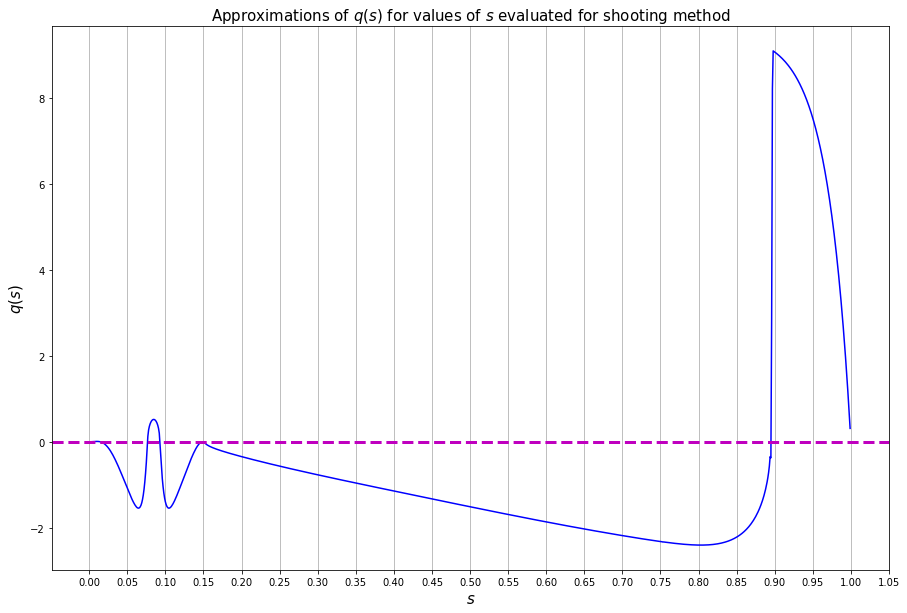

In [3]:
t = linspace(0, 2, 1000)
s = array([i/1000 for i in range(1, 1000)])
sols = array([odeint(q_prime, (y, 0), t)[-1,1] for y in s])

plt.figure(figsize=(15,10))
plt.plot(s, sols, 'b')
plt.axhline(y=0, c='m', ls='--', lw=3)
plt.xticks(arange(0,1.1,.05))
plt.grid(axis='x')
plt.ylabel(r'$q(s)$', size=15)
plt.xlabel(r'$s$', size=15)
plt.title(r'Approximations of $q(s)$ for values of $s$ evaluated for shooting method',
          size=15)
plt.show()

### Refine to find closer estimates and zoom in concerned zones

In <font color='red'>red</font>, zones where there is no intercept, in <font color='green'>green</font>, zones where $q(s)$ intercepts $y=0$.

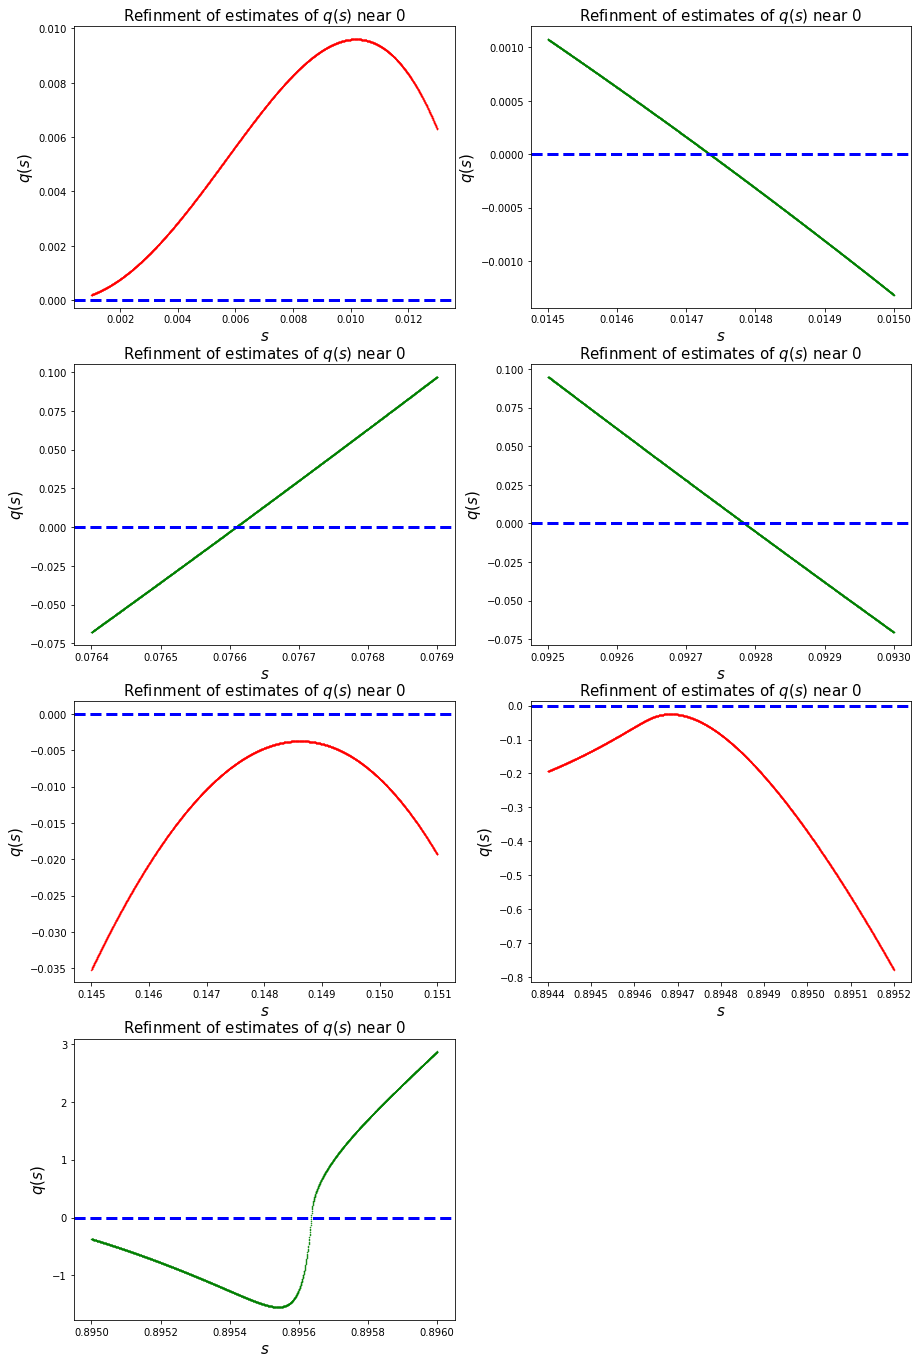

In [4]:
# intervals to study
its = [(1/1000, .013, 'r.'), (.0145, .0150, 'g.'), (.0764, .0769, 'g.'),
      (.0925, .0930, 'g.'), (.145, .151, 'r.'), (.8944, .8952, 'r.'),
      (.8950, .8960, 'g.')]

plt.figure(figsize=(15,30))
clines = []
for i in range(len(its)):
    s_r = linspace(its[i][0], its[i][1], 2000)
    sols_r = array([odeint(q_prime, (y, 0), t)[-1,1] for y in s_r])
    plt.subplot(5,2,i+1)
    plt.plot(s_r, sols_r, its[i][2], ms=1)
    plt.axhline(y=0, c='b', ls='--', lw=3)
    plt.ylabel(r'$q(s)$', size=15)
    plt.xlabel(r'$s$', size=15)
    plt.title(r'Refinment of estimates of $q(s)$ near 0', size=15)
    
    # for each solution for which we find a cline, record the point closest to 0
    if its[i][2] == 'g.':
        clines.append(s_r[argmin(abs(sols_r))])
        
plt.show()

### Now that we have confirmation of the interval where each cline is located, we can look at the graphs for each solution we obtained using the shooting method.

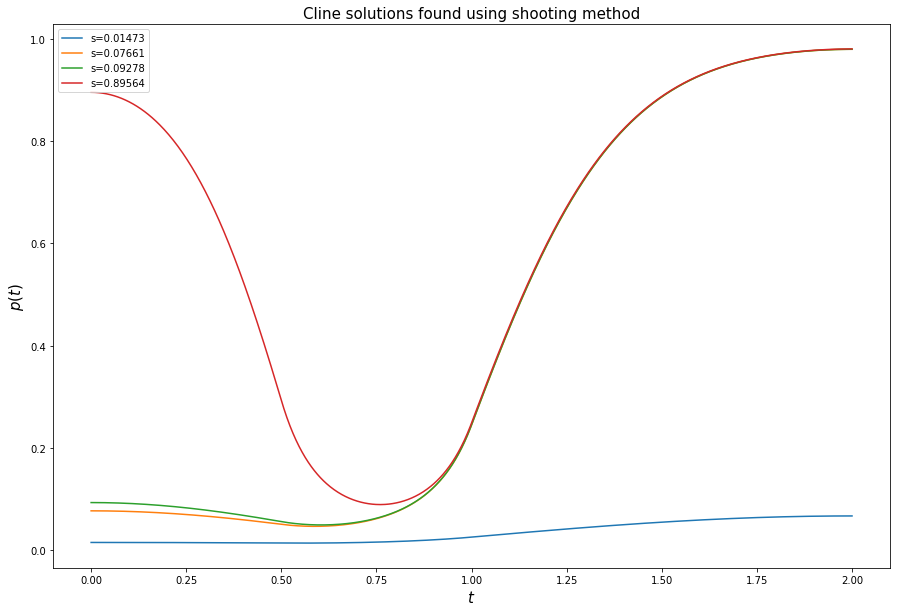

In [5]:
plt.figure(figsize=(15,10))
for cline in clines:
    y_vec = odeint(q_prime, (cline, 0), t)[:,0]
    plt.plot(t, y_vec, label='s={:.5f}'.format(cline))
plt.ylabel(r'$p(t)$', size=15)
plt.xlabel(r'$t$', size=15)
plt.title("Cline solutions found using shooting method", size=15)
plt.legend()
plt.show()